In [1]:
import os
os.chdir("../")

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.core.debugger import set_trace
from scipy.stats import rankdata
import matplotlib.colors as mcolors
import itertools as it
import functools as ft
import dataclasses
from typing import NamedTuple
from utils import generate
from more_itertools import chunked

In [3]:
%matplotlib widget

In [4]:
sns.set()

In [5]:
six_clusters = generate.generate_6_clusters()

In [37]:
class radius_weights:
    def __init__(self, radius):
        self.radius = radius
        
    def __call__(self, centroids, x):
        weights = np.linalg.norm(
            centroids[:, np.newaxis, :] - x, 
            axis=-1
        )
        return np.where(weights < self.radius, weights, 0)

In [143]:
class gaus_weights:
    def __init__(self, sigma):
        self.denom = 1 / (2 * np.sqrt(sigma * np.pi))
        self.sigma = sigma
        self.exp_denom = 1 / (2 * np.power(sigma, 2))
        
    def __call__(self, centroids, x):
        weights = np.linalg.norm(
            centroids[:, np.newaxis, :] - x, 
            axis=-1
        )
        return self.denom * np.exp(-np.power(weights, 2) * self.exp_denom)

In [41]:
def shift(centroids, x, weights_fn):
    weights = weights_fn(centroids, x)
    numerator = np.sum(weights[..., None] * x,  axis=1)
    denominator = np.sum(weights, axis=1) + np.finfo(float).eps
    denominator = denominator[:, None]
    new_centroids = numerator / denominator
    return new_centroids

In [133]:
def shift_till(x, weight_fn, eps=0.1,  verbose=True):
    distance = eps + 1
    centroids = x
    while eps < distance: 
        new_centroids = shift(centroids, x, weight_fn)
        distance = np.linalg.norm(centroids - new_centroids)
        if verbose:
            print(f"distance={distance}")
        centroids = new_centroids
    
        
        
def snap_till(x, weight_fn, eps=0.1,  verbose=True):
    distance = eps + 1
    centroids = x
    yield centroids
    while eps < distance: 
        new_centroids = shift(centroids, x, weight_fn)
        yield new_centroids
        distance = np.linalg.norm(centroids - new_centroids)
        if verbose:
            print(f"distance={distance}")
        centroids = new_centroids
    
        

In [134]:
class Seq2D:
    """Plot the evolution of the 2D EM algorithm"""
    
    def __init__(self, fig, ax, snaps, **kwargs):
        self.fig = fig
        self.ax = ax
        self.snaps = snaps
        self.sp = self.ax.scatter(*self.snaps[0].T, **kwargs)
        
    def plot(self, i):
        self.sp.set_offsets(self.snaps[i])
        self.fig.canvas.draw()


In [152]:
radius_snaps = list(snap_till(six_clusters, radius_weights(2), verbose=True))

distance=30.47958746377328
distance=14.735510385957681
distance=5.799988179852353
distance=2.9398504955298415
distance=1.8539407240786359
distance=0.959986329620958
distance=0.9795019750844487
distance=0.7899426071607742
distance=0.32532282516169275
distance=0.20964075736699206
distance=0.032484267323114935


interactive(children=(IntSlider(value=5, description='i', max=11), Output()), _dom_classes=('widget-interact',…

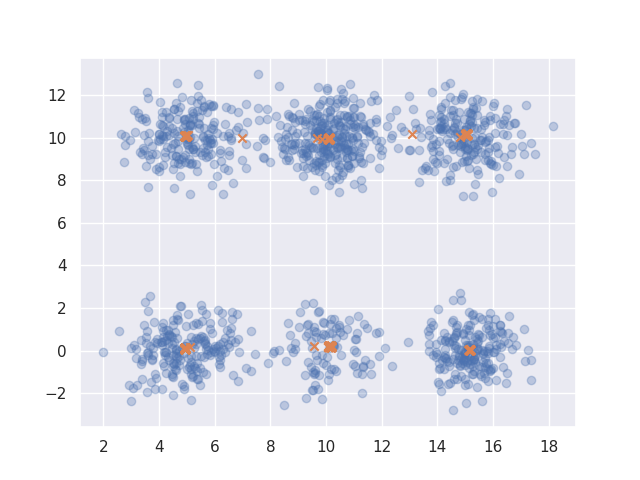

In [157]:
fig, ax = plt.subplots()
ax.scatter(*six_clusters.T, label='data', alpha=0.3)
interactive_viz = Seq2D(fig, ax, radius_snaps, marker='x')
_ = widgets.interact(interactive_viz.plot, i=(0, len(radius_snaps) - 1, 1))

In [155]:
gaus_snaps = list(snap_till(six_clusters, gaus_weights(1), verbose=True))

distance=21.904514490481283
distance=12.052820787442377
distance=6.98746439431574
distance=4.264347472866783
distance=2.5897348437976304
distance=1.5130547310273532
distance=0.8892224714921975
distance=0.6353140011934822
distance=0.5222382911015698
distance=0.3534703663097532
distance=0.20252296161809408
distance=0.11005585781373799
distance=0.05945837712651825


interactive(children=(IntSlider(value=6, description='i', max=13), Output()), _dom_classes=('widget-interact',…

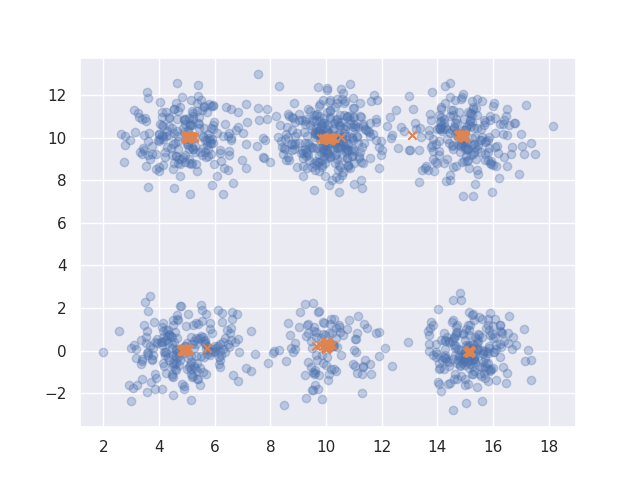

In [156]:
fig, ax = plt.subplots()
ax.scatter(*six_clusters.T, label='data', alpha=0.3)
interactive_viz = Seq2D(fig, ax, gaus_snaps, marker='x')
_ = widgets.interact(interactive_viz.plot, i=(0, len(gaus_snaps) - 1, 1))